# Capstone Project - The Battle of Neighborhoods(Week1)

## 1. Description of the Problem

__London__ is the __capital__ and __largest city__ of __England__ and the __United Kingdom__. London has been a major settlement for two millennia. London is considered to be one of the world's most important __global__ cities and has been called the world's most powerful, most desirable, most influential, most visited, most expensive, sustainable, most investment-friendly,and most-popular-for-work city. London also has largest __financial__ institutions and is also home to __top-ranked__ universities in the world. ([Wiki](https://en.wikipedia.org/wiki/London))

London has always been a __dream__ city for me personally to move and live there. To move to such a vibrant city, one of the main concerns is to find good __affordable__ accomodation in a __safe__ neighborhood. Therfore in this project, I intend to explore London neighborhoods and find the best the neighborhood to move in. This project could potentially help other people who have similar interests to move to London and live there.  

Through this project, I would like to get to know the safest borough (less crime rate as one of main factor) and its neighborhoods venues.

## 2. Data description

To get the desired results, following data sources will be used. 
1. London Recorded Crime ([Crime Data](https://data.london.gov.uk/dataset/recorded_crime_summary))(Last 24 months data is considered for evaluation)
2. List of London Boroughs ([List](https://en.wikipedia.org/wiki/List_of_London_boroughs))
3. Foursquare APIs are used too explore neighborhoods and target different venues according to the presence of needed facilities. The data is stored in the dataframe and used for visualization.






In [2]:
!conda install -c anaconda beautifulsoup4 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py36_0         168 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/linux-64::beautifulsoup4-4.9.1-py36_0
  soupsieve          anaconda/noarch::soupsieve-2.0.1-py_0

The following packag

In [3]:
from bs4 import BeautifulSoup
import datetime
import re
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import csv
import xml
import json # library to handle JSON files
import requests # library to handle requests

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#Foursquare APIs
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

print("Libraries Import Done!")

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-

### 2.1 Getting London Crime Data

Reading the data from the Data source and storing in Dataframe

In [145]:
#Direct Link to File
#https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv
#file_loc= https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv

# Read crime records data
crime_lon = pd.read_csv("MPS Borough Level Crime (most recent 24 months).csv")
#print("Data successfully read")
crime_lon.head(10)

,MajorText,MinorText,LookUp_BoroughName,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,97,127,138,130,140,113,134,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,45,24,29,27,21,27,31,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,114,107,99,96,114,96,71,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,5,2,6,5,9,6,11,7,7,10,12,3,13,4,6,11,11
5,Drug Offences,Possession of Drugs,Barking and Dagenham,69,77,70,72,64,75,69,79,74,117,104,86,100,92,74,81,86,94,79,97,107,105,145,178
6,Miscellaneous Crimes Against Society,Bail Offences,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,Miscellaneous Crimes Against Society,Bigamy,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,Miscellaneous Crimes Against Society,Dangerous Driving,Barking and Dagenham,2,1,2,1,0,2,1,1,0,1,1,1,0,1,2,0,1,1,2,2,0,2,0,2
9,Miscellaneous Crimes Against Society,"Disclosure, Obstruction, False or Misleading S...",Barking and Dagenham,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
crime_lon['MinorText'].unique()

array(['Arson', 'Criminal Damage', 'Burglary - Business and Community',
       'Burglary - Residential', 'Drug Trafficking',
       'Possession of Drugs', 'Bail Offences', 'Bigamy',
       'Dangerous Driving',
       'Disclosure, Obstruction, False or Misleading State',
       'Exploitation of Prostitution',
       'Fraud or Forgery Associated with Driver Records',
       'Going Equipped for Stealing', 'Handling Stolen Goods',
       'Making, Supplying or Possessing Articles for use i',
       'Obscene Publications', 'Other Forgery',
       'Other Notifiable Offences', 'Perjury',
       'Perverting Course of Justice', 'Possession of False Documents',
       'Profitting From or Concealing Proceeds of Crime',
       'Threat or Possession With Intent to Commit Crimina',
       'Wildlife Crime', 'Other Firearm Offences',
       'Possession of Article with Blade or Point',
       'Possession of Firearm with Intent',
       'Possession of Firearms Offences', 'Possession of Other Weapon',
   

#### Crime Data Exploration of London Boroughs

Identifying the Crime rates in each of Boroughs

In [54]:
# Dimension of Data
crime_lon.shape

(1566, 27)

In [55]:
# Names of Boroughs in London City
crime_lon['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [146]:
crime_lon.rename(columns={"LookUp_BoroughName": "BoroughName"},inplace=True)
crime_lon.head(10)

,MajorText,MinorText,BoroughName,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,97,127,138,130,140,113,134,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,45,24,29,27,21,27,31,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,114,107,99,96,114,96,71,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,5,2,6,5,9,6,11,7,7,10,12,3,13,4,6,11,11
5,Drug Offences,Possession of Drugs,Barking and Dagenham,69,77,70,72,64,75,69,79,74,117,104,86,100,92,74,81,86,94,79,97,107,105,145,178
6,Miscellaneous Crimes Against Society,Bail Offences,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,Miscellaneous Crimes Against Society,Bigamy,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,Miscellaneous Crimes Against Society,Dangerous Driving,Barking and Dagenham,2,1,2,1,0,2,1,1,0,1,1,1,0,1,2,0,1,1,2,2,0,2,0,2
9,Miscellaneous Crimes Against Society,"Disclosure, Obstruction, False or Misleading S...",Barking and Dagenham,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
# Get the total count of incidents and show them in a column(Sum)
crime_lon['Sum'] = crime_lon.iloc[:,3:27].sum(axis=1)
crimesum = crime_lon['Sum']
crime_lon.drop(labels=['Sum'], axis=1,inplace = True)
crime_lon.insert(3, 'Sum', crimesum)
crime_lon.head()

,MajorText,MinorText,BoroughName,Sum,201806,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,127,12,6,5,3,8,5,1,5,2,5,5,11,3,5,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2691,123,127,101,107,132,105,88,97,127,138,130,140,113,134,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,700,33,30,18,33,32,39,33,45,24,29,27,21,27,31,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,2337,77,94,84,99,94,106,164,114,107,99,96,114,96,71,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,177,6,8,7,10,7,7,4,5,2,6,5,9,6,11,7,7,10,12,3,13,4,6,11,11


In [148]:
# Delete unnecessary columns
crime_lon.drop(crime_lon.columns[0:2], axis=1, inplace=True)
crime_lon.drop(crime_lon.columns[2:26], axis=1, inplace=True)
crime_lon.head(10)

,BoroughName,Sum
0,Barking and Dagenham,127
1,Barking and Dagenham,2691
2,Barking and Dagenham,700
3,Barking and Dagenham,2337
4,Barking and Dagenham,177
5,Barking and Dagenham,2194
6,Barking and Dagenham,1
7,Barking and Dagenham,1
8,Barking and Dagenham,26
9,Barking and Dagenham,1


In [149]:
# Calculate sum of incidents by boroughs
crime_lon = crime_lon.groupby(['BoroughName'], as_index=False).sum()
crime_lon.head(10)

,BoroughName,Sum
0,Barking and Dagenham,38713
1,Barnet,59484
2,Bexley,33832
3,Brent,60193
4,Bromley,47930
5,Camden,73692
6,Croydon,65825
7,Ealing,60481
8,Enfield,58667
9,Greenwich,54865


#### Gettting the Sum of Crime related Incidents of each Borough

In [150]:
crime_lon.sort_values(['Sum'], ascending = False, axis = 0, inplace = True )

#### Getting Top 5 Boroughs based on total crimes 

In [151]:
df_top5_Lon = crime_lon.head() 
df_top5_Lon

,BoroughName,Sum
32,Westminster,144220
27,Southwark,74133
5,Camden,73692
24,Newham,70706
20,Lambeth,69258


__Westminister__ Borough has the __highest__ Crime related incidients. 

Plotting the top 5 Boroughs

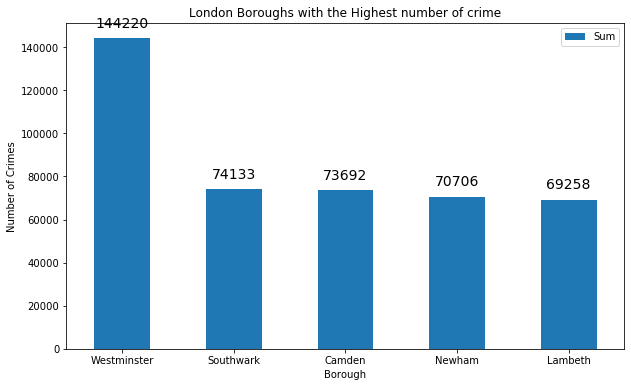

In [152]:
df_plt_lon = df_top5_Lon[['BoroughName','Sum']]

df_plt_lon.set_index('BoroughName',inplace = True)

ax = df_plt_lon.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to y-label to the plot
ax.set_xlabel('Borough') # add x-label to the plot
ax.set_title('London Boroughs with the Highest number of crime') # add title to the plot

# Creating a function to display the Sum.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

#### Getting Bottom 5 Boroughs based on total crimes

In [153]:
crime_lon.sort_values(['Sum'], ascending = True, axis = 0, inplace = True )
df_bot5_Lon = crime_lon.head() 
df_bot5_Lon

,BoroughName,Sum
22,London Heathrow and London City Airports,6479
19,Kingston upon Thames,25311
26,Richmond upon Thames,25410
28,Sutton,26826
23,Merton,28115


Plotting the Bottom 5 Boroughs

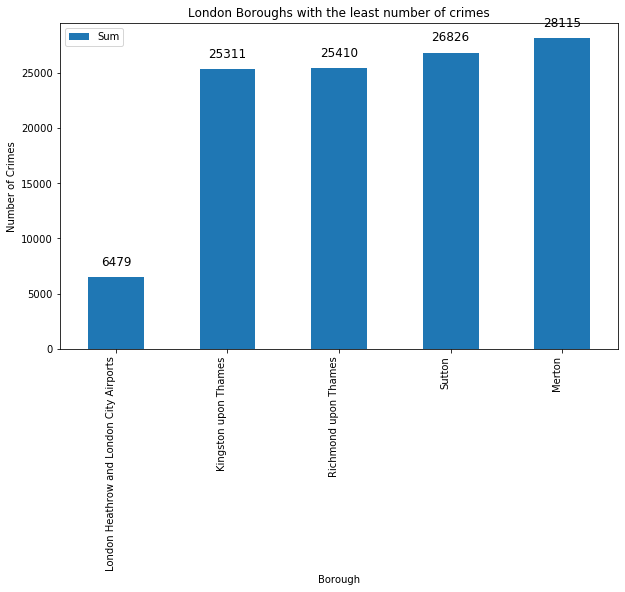

In [154]:
df_bt_lon = df_bot5_Lon[['BoroughName','Sum']]
df_bt_lon.set_index('BoroughName',inplace = True)
ax = df_bt_lon.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to y-label to the plot
ax.set_xlabel('Borough') # add x-label to the plot
ax.set_title('London Boroughs with the least number of crimes') # add title to the plot
plt.xticks(rotation=90, ha='right')


# Creating a function to display the Sum.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 15), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

Airport areas are ignored in the scope of this project based on the assumption that there are no residential areas in vicinity of Airport.
__Kingston upon Thames__ is the Borough with __lowest__ crime incident

#### Computing the Monthly Average Crimes in Each Borough

In [155]:
# Change the sum into monthly average. Since the data is collected over last 24 months, we need to consider for last 24 months
crime_lon['Sum'] = crime_lon['Sum']/24
crime_lon.rename(columns={crime_lon.columns[1]:'MonthlyAverageCrimes'}, inplace=True)
crime_lon.head()

,BoroughName,MonthlyAverageCrimes
22,London Heathrow and London City Airports,269.958333
19,Kingston upon Thames,1054.625000
26,Richmond upon Thames,1058.750000
28,Sutton,1117.750000
23,Merton,1171.458333


Getting borough with most number of Crime related incidents based on Monthly average

In [156]:
# Getting borough with most number of Crime related incidents
crime_lon.sort_values(by='MonthlyAverageCrimes', ascending=False).head(10)

,BoroughName,MonthlyAverageCrimes
32,Westminster,6009.166667
27,Southwark,3088.875000
5,Camden,3070.500000
24,Newham,2946.083333
20,Lambeth,2885.750000
29,Tower Hamlets,2826.833333
6,Croydon,2742.708333
10,Hackney,2711.875000
12,Haringey,2597.125000
7,Ealing,2520.041667


Getting borough with Least number of Crime related incidents based on Monthly average

In [157]:
# Getting borough with least number of Crime related incidents
crime_lon.sort_values(by='MonthlyAverageCrimes', ascending=True).head()

,BoroughName,MonthlyAverageCrimes
22,London Heathrow and London City Airports,269.958333
19,Kingston upon Thames,1054.625000
26,Richmond upon Thames,1058.750000
28,Sutton,1117.750000
23,Merton,1171.458333


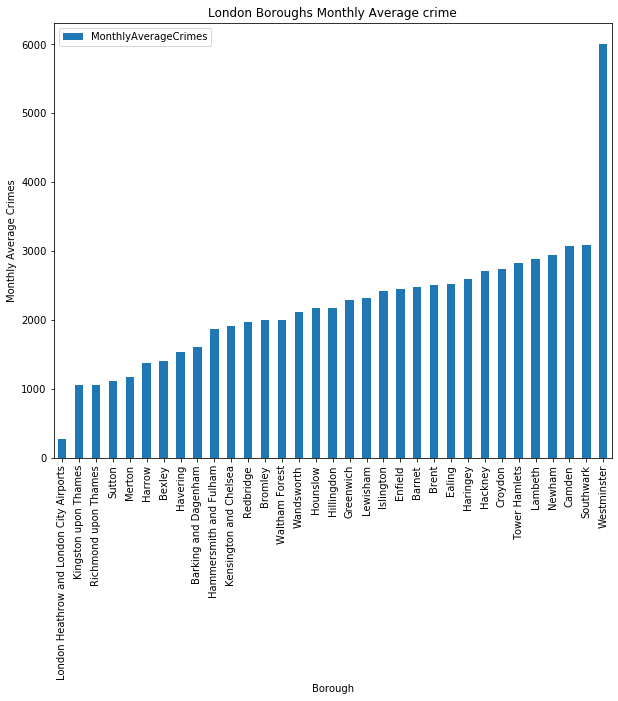

In [158]:
df_mac = crime_lon[['BoroughName','MonthlyAverageCrimes']]
df_mac.set_index('BoroughName',inplace = True)

ax = df_mac.plot(kind='bar', figsize=(10, 8), rot=0)

ax.set_ylabel('Monthly Average Crimes') # add to y-label to the plot
ax.set_xlabel('Borough') # add x-label to the plot
ax.set_title('London Boroughs Monthly Average crime') # add title to the plot
plt.xticks(rotation=90)

from matplotlib import pyplot as plt
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.show()

### 2.2 Getting list of Boroughs in London

Getting the list of Bororughs from Wiki

In [159]:
London_wiki = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
print("Import successful!")

Import successful!


In [160]:
soup = BeautifulSoup(London_wiki, 'html.parser')
table=soup.find('table', attrs={'class':'wikitable sortable'})
print(table.tr.text)


Borough

Inner

Status

Local authority

Political control

Headquarters

Area (sq mi)

Population (2013 est)[1]

Co-ordinates

 Nr. in map 



In [166]:
column_names=['Borough','Inner','Status','Local authority','Political control','Headquarters','Area (sq mi)','Population','Co-ordinates','Nr. in map']
df_lon = pd.DataFrame(columns=column_names)

Extracting the borough information from the table in Wiki page 

In [167]:
# extracting information from the table
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==10:
        df_lon.loc[len(df_lon)] = row_data
df_lon.head(10)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population,Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
1,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
2,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
3,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12
4,Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,20
5,Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...,11
6,Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...,19
7,Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...,13
8,Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...,30
9,Greenwich [note 2],Y [note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...,22


In [168]:
df_lon.shape

(32, 10)

In [169]:
#df_lon.drop(['Inner','Status','Local authority','Political control','Headquarters','Area (sq mi)','Nr. in map'], axis=1)
df_lon.drop(df_lon.columns[1:7], axis='columns', inplace=True)
df_lon.drop(['Nr. in map'] , axis='columns', inplace=True)
df_lon.head()

,Borough,Population,Co-ordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [170]:
# Removing all the extra texts in the Borough names.For ex: [note 1], removing any numerical values
df_lon['Borough'] = df_lon['Borough'].map(lambda x: x.rstrip(']'))
df_lon['Borough'] = df_lon['Borough'].map(lambda x: x.rstrip('1234567890.'))
df_lon['Borough'] = df_lon['Borough'].str.replace('note','')
df_lon['Borough'] = df_lon['Borough'].map(lambda x: x.rstrip(' ['))
df_lon.head(10)

,Borough,Population,Co-ordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich,"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


Co-ordinates Contains Latitude, Longitude and other information. For Foursquare APIs, we only Latitude and Longitude

In [171]:
# Splitting the coordinates in to Latitude, Longitude
df_lon[['Coord1','Coord2','Coord3']] = df_lon['Co-ordinates'].str.split('/',expand=True)
df_lon.head()

,Borough,Population,Co-ordinates,Coord1,Coord2,Coord3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [172]:
# Dropping the Coordinates, Coord1, coord2, Derive Latitude and Longitude from Coord3
df_lon.drop(labels=['Co-ordinates','Coord1','Coord2'], axis=1,inplace = True)
df_lon[['Latitude','Longitude']] = df_lon['Coord3'].str.split(';',expand=True)
df_lon.head()

,Borough,Population,Coord3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


As seen from the table, Longitude column has more text. It should contain only Longitudinal values

In [173]:
# Remove the unwated text from Longitude Column. 
import string, re

# Droping Coord3 Column
df_lon.drop(labels=['Coord3'], axis=1,inplace = True)

# Removing all special characters
df_lon['Latitude'] = df_lon['Latitude'].apply(lambda x: x.encode('ascii', 'ignore').decode().strip())
df_lon['Longitude'] = df_lon['Longitude'].apply(lambda x: x.encode('ascii', 'ignore').decode().strip())

# Removing all the text, spaces , () from Latitude adn Longitude Column
df_lon['Latitude'] = df_lon['Latitude'].str.translate(str.maketrans('','','abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ')).replace("()", "")
df_lon['Longitude'] = df_lon['Longitude'].str.translate(str.maketrans('','','abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ')).replace("()", "")
df_lon['Longitude'] = df_lon['Longitude'].map(lambda x: x.rstrip(' ('))
df_lon['Longitude'] = df_lon['Longitude'].map(lambda x: x.rstrip(')'))
df_lon['Longitude']
df_lon.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607,0.1557(
1,Barnet,"369,088",51.6252,-0.1517(
2,Bexley,"236,687",51.4549,0.1505(
3,Brent,"317,264",51.5588,-0.2817(
4,Bromley,"317,899",51.4039,0.0198(


In [174]:
df_lon['Longitude'] = df_lon['Longitude'].map(lambda x: x.rstrip(' ('))
df_lon['Longitude'] = df_lon['Longitude'].map(lambda x: x.rstrip(')'))
df_lon['Longitude']

0      0.1557
1     -0.1517
2      0.1505
3     -0.2817
4      0.0198
5     -0.1255
6     -0.0977
7     -0.3089
8     -0.0799
9      0.0648
10    -0.0553
11    -0.2339
12    -0.1119
13    -0.3346
14     0.1837
15    -0.4760
16    -0.3680
17    -0.1022
18    -0.1947
19    -0.3064
20    -0.1163
21    -0.0209
22    -0.1958
23     0.0469
24     0.0741
25    -0.3260
26    -0.0804
27    -0.1945
28    -0.0059
29    -0.0134
30    -0.1910
31    -0.1372
Name: Longitude, dtype: object

In [81]:
# Get Unique Boroghs
df_lon['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

### 2.3 Foursquare APIs

Using Foursquare APIs, geographical data for London city is obtained. This data will be used to explore the venues in each of the neighborhoods of London.

The data from these venues will provide the needed inputs for further analysis in next step of project(Part 2). Based on the amenities present near each venue, we can determine the good neighborhoods for living in London.

In the next course of the project, this Dataset shall be merged with London crime dataset to evaluate good neighborhood with top facilities.


#### Getting connection to Foursquare APIs with Credentials

In [32]:
# Fourspquare APIs data

In [176]:
address = 'London, UK'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude  = location.latitude
longitude  = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


In [177]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)  
map_london

### 3. Modeling of Data Gathered

In this section, we will explore the data and use visualizations to present the analysis. 

1. Exploratory Analysis of Data
2. Finding all the venues within a 500m radius of each neighborhood.
3. Perform one hot encoding on the venues data.
4. Grouping the venues by the neighborhood and calculating their mean.
5. Performing a K-means clustering (Defining K = 5)


In [178]:
def getNearbyVenuesInLondon(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Getting top 50 venues list of within a radius of 500

In [179]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
london_venues = getNearbyVenuesInLondon(names=df_lon['Borough'],
                                   latitudes=df_lon['Latitude'],
                                   longitudes=df_lon['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [180]:
print(london_venues.shape)
london_venues.head(10)

(1129, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
5,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station
6,Barking and Dagenham,51.5607,0.1557,Dagenham Swimming Pool,51.560946,0.150054,Pool
7,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café
8,Barnet,51.6252,-0.1517,Beaconsfield Road (BF),51.622827,-0.151466,Bus Stop
9,Barnet,51.6252,-0.1517,Oakleigh Cafe,51.623412,-0.154899,Café


Getting the Crime Data, List of Borough Data

In [181]:
crime_lon.head(10)

,BoroughName,MonthlyAverageCrimes
22,London Heathrow and London City Airports,269.958333
19,Kingston upon Thames,1054.625000
26,Richmond upon Thames,1058.750000
28,Sutton,1117.750000
23,Merton,1171.458333
13,Harrow,1375.666667
2,Bexley,1409.666667
14,Havering,1537.791667
0,Barking and Dagenham,1613.041667
11,Hammersmith and Fulham,1872.166667


Airport areas are ignored in the scope of this project based on the assumption that there are no residential area in vicinity of Airport.

In [182]:
# Drop Airport area & not included in population data
crime_lon.drop([22], inplace=True)
crime_lon.head(10)

,BoroughName,MonthlyAverageCrimes
19,Kingston upon Thames,1054.625000
26,Richmond upon Thames,1058.750000
28,Sutton,1117.750000
23,Merton,1171.458333
13,Harrow,1375.666667
2,Bexley,1409.666667
14,Havering,1537.791667
0,Barking and Dagenham,1613.041667
11,Hammersmith and Fulham,1872.166667
18,Kensington and Chelsea,1913.375000


In [183]:
df_lon.rename(columns={"Borough": "BoroughName"},inplace=True)
df_lon.head(10)

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607,0.1557
1,Barnet,"369,088",51.6252,-0.1517
2,Bexley,"236,687",51.4549,0.1505
3,Brent,"317,264",51.5588,-0.2817
4,Bromley,"317,899",51.4039,0.0198
5,Camden,"229,719",51.5290,-0.1255
6,Croydon,"372,752",51.3714,-0.0977
7,Ealing,"342,494",51.5130,-0.3089
8,Enfield,"320,524",51.6538,-0.0799
9,Greenwich,"264,008",51.4892,0.0648


Removing the ',' in Population 

In [184]:
df_lon['Population'] = df_lon['Population'].str.replace(',','')
df_lon.head(10)

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198
5,Camden,229719,51.5290,-0.1255
6,Croydon,372752,51.3714,-0.0977
7,Ealing,342494,51.5130,-0.3089
8,Enfield,320524,51.6538,-0.0799
9,Greenwich,264008,51.4892,0.0648


In [185]:
london_venues.head(10)

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
5,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station
6,Barking and Dagenham,51.5607,0.1557,Dagenham Swimming Pool,51.560946,0.150054,Pool
7,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café
8,Barnet,51.6252,-0.1517,Beaconsfield Road (BF),51.622827,-0.151466,Bus Stop
9,Barnet,51.6252,-0.1517,Oakleigh Cafe,51.623412,-0.154899,Café


#### Merging the Data(Crime and Borough list) based on Borough name

In [186]:
#Combine crime data and borough information data
df_merged = pd.merge(crime_lon,df_lon, how='outer', on='BoroughName')
df_merged.head()

,BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude
0,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064
1,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260
2,Sutton,1117.750000,195914,51.3618,-0.1945
3,Merton,1171.458333,203223,51.4014,-0.1958
4,Harrow,1375.666667,243372,51.5898,-0.3346


In [187]:
#Check data type
df_merged.dtypes

BoroughName              object
MonthlyAverageCrimes    float64
Population               object
Latitude                 object
Longitude                object
dtype: object

Population, Latitude, Longitude are type Object,converting to Numeric

In [188]:
df_merged['Population'] = pd.to_numeric(df_merged['Population'])
df_merged['Latitude'] = pd.to_numeric(df_merged['Latitude'])
df_merged['Longitude'] = pd.to_numeric(df_merged['Longitude'])
df_merged.dtypes

BoroughName              object
MonthlyAverageCrimes    float64
Population                int64
Latitude                float64
Longitude               float64
dtype: object

#### Converting the Crime rate to 1000 people per Monthly average

In [189]:
#Create a column that shows the number of crimes per 1000 people per month
df_merged['Population'].astype(float)
df_merged['CrimeToPopulation'] = df_merged['MonthlyAverageCrimes'] / df_merged['Population'] * 1000
df_merged.head()

,BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPopulation
0,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957
1,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260,5.532621
2,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309
3,Merton,1171.458333,203223,51.4014,-0.1958,5.764398
4,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526


#### Visualization Crime rates for 1000 people per each Borough

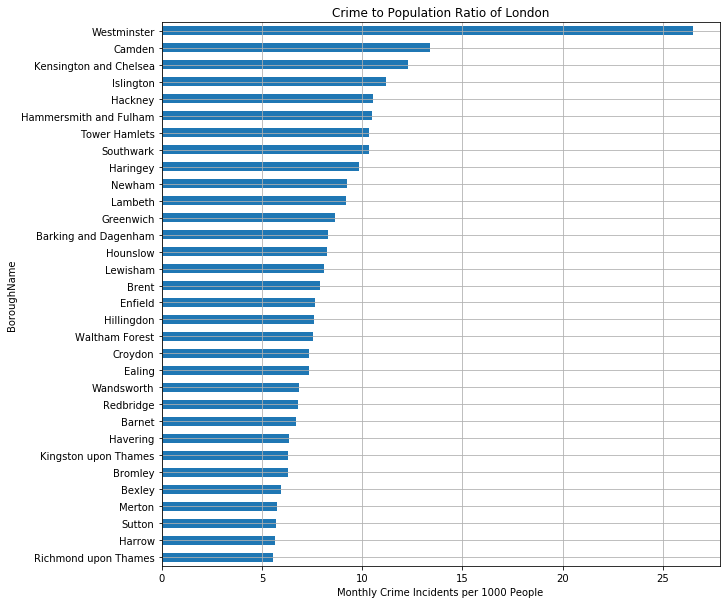

In [190]:
#Visualize crime per 1000 people
df_merged.set_index('BoroughName')['CrimeToPopulation'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Crime Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

From the above plot, we see that Westminister and Camden has highest crime incidents for 1000 people

In [191]:
from geopy.geocoders import Nominatim

In [192]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='Red',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

#### Clustering of Data
In this section, we will conduct K-means clustering, to group the boroughs according to the facilities they offer using Foursquare data.


In [193]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 179 uniques categories.


#### Onehot Enconding

In [194]:
# One hot encoding before clustering
onehot_lon = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

In [195]:
# Add borough name back to dataframe
borough = london_venues['BoroughName']
onehot_lon.insert(0, 'BoroughName', borough)
onehot_lon.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [196]:
onehot_lon.shape

(1129, 180)

#### Computing the Mean Frequency of each Venue Category for each Borough

In [197]:
# Group rows by borough and take the mean of frequency of each venue category
grp_lon = onehot_lon.groupby('BoroughName').mean().reset_index()
grp_lon

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.00000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.142857,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.142857,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000
1,Barnet,0.00000,0.000000,0.0

In [198]:
# top 5 venues for each neighborhood
num_top_venues = 5

for nghood in grp_lon['BoroughName']:
    print("----"+nghood+"----")
    temp = grp_lon[grp_lon['BoroughName'] == nghood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Pool  0.14
1     Martial Arts Dojo  0.14
2           Supermarket  0.14
3           Golf Course  0.14
4  Gym / Fitness Center  0.14


----Barnet----
                venue  freq
0                Café  0.67
1            Bus Stop  0.33
2  African Restaurant  0.00
3                Park  0.00
4        Optical Shop  0.00


----Bexley----
                  venue  freq
0                   Pub  0.10
1           Coffee Shop  0.10
2        Clothing Store  0.10
3  Fast Food Restaurant  0.07
4              Pharmacy  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.08
3        Grocery Store  0.06
4  Sporting Goods Shop  0.04


----Bromley----
                  venue  freq
0        Clothing Store  0.13
1           Coffee Shop  0.13
2           Pizza Place  0.05
3                   Bar  0.05
4  Gym / Fitness Center  0.05


----Camden----
    

Reading the data in Dataframes for further analysis

In [199]:
# storing the data to dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10 # Top venues

indicators = ['st', 'nd', 'rd'] # indicators

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted_lon = pd.DataFrame(columns=columns)
venues_sorted_lon['BoroughName'] = grp_lon['BoroughName']

for ind in np.arange(grp_lon.shape[0]):
    venues_sorted_lon.iloc[ind, 1:] = return_most_common_venues(grp_lon.iloc[ind, :], num_top_venues)

venues_sorted_lon.head(10)

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
1,Barnet,Café,Bus Stop,Yoga Studio,Gaming Cafe,French Restaurant,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Sporting Goods Shop,Bar,Hotel Bar,Bubble Tea Shop
4,Bromley,Clothing Store,Coffee Shop,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,Electronics Store,Cosmetics Shop,Portuguese Restaurant,Pub
5,Camden,Hotel,Coffee Shop,Café,Burger Joint,Train Station,Pizza Place,Garden,Breakfast Spot,Deli / Bodega,Used Bookstore
6,Croydon,Pub,Coffee Shop,Portuguese Restaurant,Hotel Bar,Sandwich Place,Malay Restaurant,Gaming Cafe,Burger Joint,Burrito Place,Mediterranean Restaurant
7,Ealing,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant,Park,Pub,Polish Restaurant,Sandwich Place
8,Enfield,Coffee Shop,Clothing Store,Optical Shop,Pub,Pharmacy,Sandwich Place,Shopping Mall,Bookstore,Supermarket,Café
9,Greenwich,Pub,Coffee Shop,Fast Food Restaurant,Clothing Store,Sandwich Place,Hotel,Grocery Store,Pharmacy,Supermarket,Platform


#### k-Clustering

In [200]:
kclusters = 5
london_cluster = grp_lon.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([0, 3, 2, 1, 2, 1, 1, 1, 2, 2], dtype=int32)

Add Clustering labels to the data

In [201]:
venues_sorted_lon.insert(0, 'Cluster Labels', kmeans.labels_)

In [202]:
# merge London Grouped with London coords to add latitude/longitude for each neighborhood
london_merged = df_merged
london_merged = london_merged.join(venues_sorted_lon.set_index('BoroughName'), on='BoroughName')

london_merged.head(10)

,BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPopulation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957,2,Café,Coffee Shop,Italian Restaurant,Pub,Burger Joint,Department Store,Thai Restaurant,Sushi Restaurant,Clothing Store,Portuguese Restaurant
1,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260,5.532621,1,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Grocery Store,Steakhouse,Pharmacy,Mediterranean Restaurant,Gastropub,Portuguese Restaurant
2,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309,2,Clothing Store,Pub,Coffee Shop,Department Store,Bar,Italian Restaurant,Pizza Place,Sandwich Place,Café,Fast Food Restaurant
3,Merton,1171.458333,203223,51.4014,-0.1958,5.764398,0,Italian Restaurant,Café,Supermarket,Bus Stop,Park,Garden Center,Grocery Store,Bar,Bakery,Coffee Shop
4,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526,0,Indie Movie Theater,Indian Restaurant,Coffee Shop,Supermarket,Fast Food Restaurant,Grocery Store,Yoga Studio,English Restaurant,Food Court,Flea Market
5,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,2,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
6,Havering,1537.791667,242080,51.5812,0.1837,6.352411,2,Coffee Shop,Shopping Mall,Clothing Store,Bakery,Fast Food Restaurant,Bookstore,Supermarket,Pub,Café,Department Store
7,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589,0,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
8,Hammersmith and Fulham,1872.166667,178685,51.4927,-0.2339,10.477470,1,Pub,Indian Restaurant,Italian Restaurant,Café,Clothing Store,Japanese Restaurant,Vietnamese Restaurant,Gastropub,Jazz Club,Pharmacy
9,Kensington and Chelsea,1913.375000,155594,51.5020,-0.1947,12.297229,2,Juice Bar,Café,Clothing Store,Bakery,Restaurant,Burger Joint,Breakfast Spot,Gym / Fitness Center,Pub,Modern European Restaurant


In [203]:
# create map of Clusters
map_clusters_lon = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_lon)
       
map_clusters_lon

In [204]:
# Cluster 1: Cluster Labels == 0
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPopulation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Merton,5.764398,0,Italian Restaurant,Café,Supermarket,Bus Stop,Park,Garden Center,Grocery Store,Bar,Bakery,Coffee Shop
4,Harrow,5.652526,0,Indie Movie Theater,Indian Restaurant,Coffee Shop,Supermarket,Fast Food Restaurant,Grocery Store,Yoga Studio,English Restaurant,Food Court,Flea Market
7,Barking and Dagenham,8.299589,0,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
23,Haringey,9.860528,0,Park,Café,Fast Food Restaurant,Grocery Store,Mediterranean Restaurant,Movie Theater,Bar,Bakery,Gym / Fitness Center,Turkish Restaurant


#### Cluster 1 consists of Venues such as Pools, Gyms, Cafes, Restaurants, Parks and Super Markets
We can call this as __Fitness Area__ 

In [205]:
# Cluster 2: Cluster Labels == 1
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPopulation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Richmond upon Thames,5.532621,1,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Grocery Store,Steakhouse,Pharmacy,Mediterranean Restaurant,Gastropub,Portuguese Restaurant
8,Hammersmith and Fulham,10.477470,1,Pub,Indian Restaurant,Italian Restaurant,Café,Clothing Store,Japanese Restaurant,Vietnamese Restaurant,Gastropub,Jazz Club,Pharmacy
12,Waltham Forest,7.535042,1,Pub,Pool,Vegetarian / Vegan Restaurant,Pizza Place,Tea Room,Beer Store,Coffee Shop,Gym / Fitness Center,Art Gallery,Deli / Bodega
18,Islington,11.201876,1,Pub,Bakery,Mediterranean Restaurant,Boutique,Theater,Burger Joint,Music Venue,Ice Cream Shop,Liquor Store,Gift Shop
21,Brent,7.905220,1,Coffee Shop,Hotel,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Sporting Goods Shop,Bar,Hotel Bar,Bubble Tea Shop
22,Ealing,7.357915,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant,Park,Pub,Polish Restaurant,Sandwich Place
24,Hackney,10.536505,1,Pub,Coffee Shop,Café,Bakery,Vegetarian / Vegan Restaurant,Brewery,Modern European Restaurant,Cocktail Bar,Grocery Store,Hotel
25,Croydon,7.357998,1,Pub,Coffee Shop,Portuguese Restaurant,Hotel Bar,Sandwich Place,Malay Restaurant,Gaming Cafe,Burger Joint,Burrito Place,Mediterranean Restaurant
26,Tower Hamlets,10.358875,1,Hotel,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Convenience Store,Chinese Restaurant,Sandwich Place,Outdoor Sculpture,Café,Bus Stop
27,Lambeth,9.183209,1,Caribbean Restaurant,Market,Pub,Pizza Place,Cocktail Bar,Tapas Restaurant,Restaurant,Beer Bar,BBQ Joint,Indian Restaurant


#### Cluster 2 is the biggest cluster which consists of Venues such as Cafes, Restaurants, Hotels, and Groceries.
We group them under __Lively Areas__

In [141]:
# Cluster 3:Cluster Labels == 2
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kingston upon Thames,-0.3064,2,Café,Coffee Shop,Italian Restaurant,Pub,Burger Joint,Department Store,Thai Restaurant,Sushi Restaurant,Clothing Store,Portuguese Restaurant
2,Sutton,-0.1945,2,Clothing Store,Pub,Coffee Shop,Department Store,Bar,Italian Restaurant,Pizza Place,Sandwich Place,Café,Fast Food Restaurant
5,Bexley,0.1505,2,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
6,Havering,0.1837,2,Coffee Shop,Shopping Mall,Clothing Store,Bakery,Fast Food Restaurant,Bookstore,Supermarket,Pub,Café,Department Store
9,Kensington and Chelsea,-0.1947,2,Juice Bar,Café,Clothing Store,Bakery,Restaurant,Burger Joint,Breakfast Spot,Gym / Fitness Center,Pub,Modern European Restaurant
10,Redbridge,0.0741,2,Clothing Store,Supermarket,Fast Food Restaurant,Department Store,Sandwich Place,Coffee Shop,Grocery Store,Bakery,Shoe Store,Buffet
11,Bromley,0.0198,2,Clothing Store,Coffee Shop,Gym / Fitness Center,Bar,Burger Joint,Pizza Place,Electronics Store,Cosmetics Shop,Portuguese Restaurant,Pub
13,Wandsworth,-0.1910,2,Coffee Shop,Clothing Store,Pub,Gym / Fitness Center,Pizza Place,Breakfast Spot,Supermarket,Asian Restaurant,Burger Joint,Indian Restaurant
15,Hillingdon,-0.4760,2,Coffee Shop,Italian Restaurant,Clothing Store,Pharmacy,Fast Food Restaurant,Pizza Place,Burger Joint,Sandwich Place,Toy / Game Store,Multiplex
16,Greenwich,0.0648,2,Pub,Coffee Shop,Fast Food Restaurant,Clothing Store,Sandwich Place,Hotel,Grocery Store,Pharmacy,Supermarket,Platform


#### Cluster 3 is one of biggest cluster which consists of Venues such as Cafes, Restaurants, Super market and shopping malls.
We group them under __Busy Areas__


In [114]:
# Cluster 4: Cluster Labels == 3
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPopulation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,Barnet,26.416013,3,Café,Bus Stop,Yoga Studio,Gaming Cafe,French Restaurant,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


#### Cluster 4 has one neighborhood which consists of Venues such as Cafe, Bus stop, Yoga studio, Gaming Cafe and French restaurant.
We group them as __Quiet Area__

In [115]:
# Cluster 5: Cluster Labels == 4
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPopulation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Hounslow,32.46293,4,Pizza Place,Café,Park,Metro Station,Yoga Studio,Event Space,Food Court,Flea Market,Fish Market,Film Studio


#### Cluster 5 has one neighborhood which consists of Venues such as Pizza Place, Cafe, parks, Metro Station and Markets.
We group them as __Noisy Area__

### 4. Results

Now we will review all the analysis made in this project before we make a conclusion on which area to live as an Expat in London.
As mentioned in the description of project, Saftey and amenities in a given location are key Criterias to select a Borough.

#### Safety
Safety of Neighborhood is directly depended on the Crime rate in the given Borough. In this project, we can consider 'CrimeToPopulation' (Recorded crime per 1000 people) as key parameter to determine the saftey.

In [206]:
london_merged.head(10)

,BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPopulation,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957,2,Café,Coffee Shop,Italian Restaurant,Pub,Burger Joint,Department Store,Thai Restaurant,Sushi Restaurant,Clothing Store,Portuguese Restaurant
1,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260,5.532621,1,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Grocery Store,Steakhouse,Pharmacy,Mediterranean Restaurant,Gastropub,Portuguese Restaurant
2,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309,2,Clothing Store,Pub,Coffee Shop,Department Store,Bar,Italian Restaurant,Pizza Place,Sandwich Place,Café,Fast Food Restaurant
3,Merton,1171.458333,203223,51.4014,-0.1958,5.764398,0,Italian Restaurant,Café,Supermarket,Bus Stop,Park,Garden Center,Grocery Store,Bar,Bakery,Coffee Shop
4,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526,0,Indie Movie Theater,Indian Restaurant,Coffee Shop,Supermarket,Fast Food Restaurant,Grocery Store,Yoga Studio,English Restaurant,Food Court,Flea Market
5,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,2,Coffee Shop,Clothing Store,Pub,Fast Food Restaurant,Italian Restaurant,Supermarket,Pharmacy,Bakery,Sandwich Place,Furniture / Home Store
6,Havering,1537.791667,242080,51.5812,0.1837,6.352411,2,Coffee Shop,Shopping Mall,Clothing Store,Bakery,Fast Food Restaurant,Bookstore,Supermarket,Pub,Café,Department Store
7,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589,0,Pool,Bus Station,Supermarket,Park,Golf Course,Gym / Fitness Center,Martial Arts Dojo,Electronics Store,Fish Market,Film Studio
8,Hammersmith and Fulham,1872.166667,178685,51.4927,-0.2339,10.477470,1,Pub,Indian Restaurant,Italian Restaurant,Café,Clothing Store,Japanese Restaurant,Vietnamese Restaurant,Gastropub,Jazz Club,Pharmacy
9,Kensington and Chelsea,1913.375000,155594,51.5020,-0.1947,12.297229,2,Juice Bar,Café,Clothing Store,Bakery,Restaurant,Burger Joint,Breakfast Spot,Gym / Fitness Center,Pub,Modern European Restaurant


In [207]:
#london_merged
CTP_lon = london_merged['CrimeToPopulation']
london_merged.drop(['CrimeToPopulation'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPopulation', CTP_lon)
london_merged.sort_values(by='CrimeToPopulation', ascending = False)

,BoroughName,CrimeToPopulation,MonthlyAverageCrimes,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,26.490655,6009.166667,226841,51.4973,-0.1372,1,Coffee Shop,Hotel,Theater,Sandwich Place,Juice Bar,Sporting Goods Shop,Sushi Restaurant,Hotel Bar,Art Gallery,Street Food Gathering
29,Camden,13.366330,3070.500000,229719,51.5290,-0.1255,1,Hotel,Coffee Shop,Café,Burger Joint,Train Station,Pizza Place,Garden,Breakfast Spot,Deli / Bodega,Used Bookstore
9,Kensington and Chelsea,12.297229,1913.375000,155594,51.5020,-0.1947,2,Juice Bar,Café,Clothing Store,Bakery,Restaurant,Burger Joint,Breakfast Spot,Gym / Fitness Center,Pub,Modern European Restaurant
18,Islington,11.201876,2415.875000,215667,51.5416,-0.1022,1,Pub,Bakery,Mediterranean Restaurant,Boutique,Theater,Burger Joint,Music Venue,Ice Cream Shop,Liquor Store,Gift Shop
24,Hackney,10.536505,2711.875000,257379,51.5450,-0.0553,1,Pub,Coffee Shop,Café,Bakery,Vegetarian / Vegan Restaurant,Brewery,Modern European Restaurant,Cocktail Bar,Grocery Store,Hotel
8,Hammersmith and Fulham,10.477470,1872.166667,178685,51.4927,-0.2339,1,Pub,Indian Restaurant,Italian Restaurant,Café,Clothing Store,Japanese Restaurant,Vietnamese Restaurant,Gastropub,Jazz Club,Pharmacy
26,Tower Hamlets,10.358875,2826.833333,272890,51.5099,-0.0059,1,Hotel,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Convenience Store,Chinese Restaurant,Sandwich Place,Outdoor Sculpture,Café,Bus Stop
30,Southwark,10.349238,3088.875000,298464,51.5035,-0.0804,1,Coffee Shop,Pub,Hotel,Hotel Bar,Art Gallery,Cocktail Bar,Theater,English Restaurant,Bar,Gym / Fitness Center
23,Haringey,9.860528,2597.125000,263386,51.6000,-0.1119,0,Park,Café,Fast Food Restaurant,Grocery Store,Mediterranean Restaurant,Movie Theater,Bar,Bakery,Gym / Fitness Center,Turkish Restaurant
28,Newham,9.257804,2946.083333,318227,51.5077,0.0469,1,Hotel,Airport Service,Chinese Restaurant,Airport,Airport Lounge,Pharmacy,Rafting,Light Rail Station,Sandwich Place,Yoga Studio


#### Amenities in each Clusters
Based on the cluster analysis performed, we will give each clusters a name according to the characteristics derived from the popular venues.
According to my interpretation, as mentioned above, Cluster 1 is __'Fitness Area'__ with gyms, parks, pools and golf courses as popular places.


In [118]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Merton', 'Harrow', 'Barking and Dagenham', 'Haringey'],
      dtype=object)

According to my interpretation, Cluster 2 is __Lively Area__ due to many pubs and restaurants.

In [119]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Richmond upon Thames', 'Hammersmith and Fulham', 'Waltham Forest',
       'Islington', 'Brent', 'Ealing', 'Hackney', 'Croydon',
       'Tower Hamlets', 'Lambeth', 'Newham', 'Camden', 'Southwark',
       'Westminster'], dtype=object)

According to my interpretation, Cluster 3 is __Busy Area__ with many coffee shops and Shopping Malls

In [145]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Barnet'], dtype=object)

According to my interpretation, Cluster 4 is __Quiet Area__  with yoga studio.

In [120]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Barnet'], dtype=object)

In [121]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Hounslow'], dtype=object)

According to my interpretation, Cluster 5 is __Noisy Area__ due to Park and metro.

Based on my personal preference, interests and as an immigrant moving to London, I would set the order of preferences as
1. Fitness Area
2. Lively Area
3. Busy Area
4. Traveller Area
5. Quiet Area


#### Weighted Score Table
Computing the weighted scores for each borough

In [137]:
wt_score = london_merged[['BoroughName','CrimeToPopulation','Cluster Labels']].copy()
wt_score.head(10)

,BoroughName,CrimeToPopulation,Cluster Labels
0,Kingston upon Thames,24.885637,2
1,Richmond upon Thames,21.708515,1
2,Sutton,22.391628,2
3,Merton,22.656966,0
4,Harrow,22.205376,0
5,Bexley,23.397638,2
6,Havering,25.013081,2
7,Barking and Dagenham,32.583920,0
8,Hammersmith and Fulham,41.270952,1
9,Kensington and Chelsea,48.614771,2


In [138]:
wt_score['Safety'] = (wt_score['CrimeToPopulation']-wt_score['CrimeToPopulation'].min())/(wt_score['CrimeToPopulation'].max()-wt_score['CrimeToPopulation'].min())
wt_score['Safety'] = (wt_score['Safety'] - 1) * -1
wt_score.head(10)

,BoroughName,CrimeToPopulation,Cluster Labels,Safety
0,Kingston upon Thames,24.885637,2,0.961917
1,Richmond upon Thames,21.708515,1,1.000000
2,Sutton,22.391628,2,0.991812
3,Merton,22.656966,0,0.988631
4,Harrow,22.205376,0,0.994044
5,Bexley,23.397638,2,0.979753
6,Havering,25.013081,2,0.960390
7,Barking and Dagenham,32.583920,0,0.869642
8,Hammersmith and Fulham,41.270952,1,0.765515
9,Kensington and Chelsea,48.614771,2,0.677488


In [208]:
wt_score['Amenities'] = 0
wt_score.head()

,BoroughName,CrimeToPopulation,Cluster Labels,Safety,Amenities
0,Kingston upon Thames,24.885637,2,0.961917,0
1,Richmond upon Thames,21.708515,1,1.000000,0
2,Sutton,22.391628,2,0.991812,0
3,Merton,22.656966,0,0.988631,0
4,Harrow,22.205376,0,0.994044,0


In [209]:
for i in range(32):
    if wt_score.iloc[i,2] == 2:
        wt_score.iloc[i,4] = 1
    elif wt_score.iloc[i,2] == 1:
        wt_score.iloc[i,4] = 0.9
    elif wt_score.iloc[i,2] == 0:
        wt_score.iloc[i,2] = 0.8
    elif wt_score.iloc[i,2] == 3:
        wt_score.iloc[i,4] = 0.7
    else:
        wt_score.iloc[i,2] = 0.6
                
wt_score.head(10)

,BoroughName,CrimeToPopulation,Cluster Labels,Safety,Amenities
0,Kingston upon Thames,24.885637,2.0,0.961917,1.0
1,Richmond upon Thames,21.708515,1.0,1.000000,0.9
2,Sutton,22.391628,2.0,0.991812,1.0
3,Merton,22.656966,0.8,0.988631,0.0
4,Harrow,22.205376,0.8,0.994044,0.0
5,Bexley,23.397638,2.0,0.979753,1.0
6,Havering,25.013081,2.0,0.960390,1.0
7,Barking and Dagenham,32.583920,0.8,0.869642,0.0
8,Hammersmith and Fulham,41.270952,1.0,0.765515,0.9
9,Kensington and Chelsea,48.614771,2.0,0.677488,1.0


In [210]:
wt_score.drop(['CrimeToPopulation'], inplace=True, axis=1)
wt_score.drop(['Cluster Labels'], inplace=True, axis=1)
wt_score['Score'] = wt_score['Safety'] + wt_score['Amenities']
wt_score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Amenities,Score
2,Sutton,0.991812,1.0,1.991812
5,Bexley,0.979753,1.0,1.979753
11,Bromley,0.964143,1.0,1.964143
0,Kingston upon Thames,0.961917,1.0,1.961917
6,Havering,0.960390,1.0,1.960390
10,Redbridge,0.939072,1.0,1.939072
13,Wandsworth,0.938054,1.0,1.938054
15,Hillingdon,0.902262,1.0,1.902262
19,Enfield,0.901386,1.0,1.901386
1,Richmond upon Thames,1.000000,0.9,1.900000


### 5. Conclusion

From our analysis, we have found that the five boroughs below are the best places to move as an expat and get Settled down quickly, based on safety and facilities currently available in the neighborhood. The top five boroughs all belong to the Busy Area cluster, with many Pubs, Cafes, Restaurants and Shopping malls. 

Crime rate (CrimeToPopulation)in these Boroughs can be considered as determining factor before moving into these boroughs.

In [211]:
df_final = df_merged.iloc[[2,5,11,0,6],:]
df_final

,BoroughName,MonthlyAverageCrimes,Population,Latitude,Longitude,CrimeToPopulation
2,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309
5,Bexley,1409.666667,236687,51.4549,0.1505,5.955826
11,Bromley,1997.083333,317899,51.4039,0.0198,6.282132
0,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957
6,Havering,1537.791667,242080,51.5812,0.1837,6.352411


In [212]:
# make a map of Londo using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_final['Latitude'], df_final['Longitude'], df_final['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map



### 6. Limitations

As seen in the map, the above boroughs are a bit far from Central London. It would take considerable amount of time to commute towards central London(assuming the work place location). Moreover, we only considered venues which are popular and have reviews. We could as well consider each borough individually and all the neighborhoods in each of borough to determine good location. 